# Временные ряды 3. 

# ARIMA



#### 1. Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os

import itertools

In [3]:
#импорт модулей для формирования модели
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

from random import random
import warnings
warnings.filterwarnings("ignore") # отключает предупреждения

In [4]:
#Path_Energy = 'PJME_hourly.csv'
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [338]:
data_m = data.copy().resample('M').mean()
data_m.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-31,31075.399731,2002.0,1.0,16.020188,1.0,16.020188,2.873486,2.905787,11.515478,0.063257,0.032301,0.064603
2002-02-28,30239.166667,2002.0,2.0,14.500000,1.0,45.500000,7.071429,3.000000,11.500000,0.035714,0.035714,0.035714
2002-03-31,28875.256720,2002.0,3.0,16.000000,1.0,75.000000,11.258065,3.193548,11.500000,0.000000,0.000000,0.000000
2002-04-30,28534.731572,2002.0,4.0,15.511822,2.0,105.511822,15.668985,2.828929,11.511822,0.000000,0.000000,0.000000
2002-05-31,28073.653226,2002.0,5.0,16.000000,2.0,136.000000,20.000000,3.000000,11.500000,0.032258,0.032258,0.032258


In [339]:
data_m.describe()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,32108.628796,2009.84000,6.420000,15.645434,2.475000,179.905434,26.140008,2.996992,11.499990,0.027135,0.026964,0.027152
std,3534.668371,4.82606,3.444258,1.084200,1.116066,104.903962,14.634509,0.115045,0.017667,0.022668,0.022522,0.022681
min,26314.458333,2002.00000,1.000000,1.530612,1.000000,16.000000,2.741935,2.530612,11.265306,0.000000,0.000000,0.000000
25%,29193.559812,2006.00000,3.000000,15.500000,1.000000,76.008748,11.702145,2.903226,11.500000,0.000000,0.000000,0.000000
50%,31879.175067,2010.00000,6.000000,16.000000,2.000000,167.500000,24.666667,3.000000,11.500000,0.032258,0.032258,0.032258
75%,34574.729839,2014.00000,9.000000,16.000000,3.000000,259.500000,37.800000,3.095967,11.500000,0.033621,0.033333,0.033621
max,40603.403226,2018.00000,12.000000,16.020188,4.000000,351.000000,51.000000,3.193548,11.515478,0.066759,0.066759,0.066759


In [340]:
# Уберем колонки которые при данном ресемпле теряют смысл
data_m = data_m.drop(['dayofmonth', 'dayofyear',
       'weekofyear', 'dayofweek', 'hour', 'is_holiday', 'is_prev_holiday',
       'is_next_holiday'], axis = 1)
data_m.head()

,PJME_MW,year,month,quarter
Date,,,,
2002-01-31,31075.399731,2002.0,1.0,1.0
2002-02-28,30239.166667,2002.0,2.0,1.0
2002-03-31,28875.256720,2002.0,3.0,1.0
2002-04-30,28534.731572,2002.0,4.0,2.0
2002-05-31,28073.653226,2002.0,5.0,2.0


In [189]:
data_w = data.copy().resample('W').mean()
data_w.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,3.517483,1.0,3.517483,1.0,3.517483,11.58042,0.160839,0.000000,0.167832
2002-01-13,31487.386905,2002.0,1.000000,10.000000,1.0,10.000000,2.0,3.000000,11.50000,0.000000,0.000000,0.000000
2002-01-20,31452.880952,2002.0,1.000000,17.000000,1.0,17.000000,3.0,3.000000,11.50000,0.000000,0.142857,0.000000
2002-01-27,30141.529762,2002.0,1.000000,24.000000,1.0,24.000000,4.0,3.000000,11.50000,0.142857,0.000000,0.142857
2002-02-03,29196.488095,2002.0,1.428571,17.714286,1.0,31.000000,5.0,3.000000,11.50000,0.000000,0.000000,0.000000


In [191]:
data_w = data_w.drop(['dayofmonth', 'month', 'quarter','dayofyear', 'dayofweek', 'hour', 'is_holiday', 'is_prev_holiday','is_next_holiday'], axis = 1)
data_w.head()

,PJME_MW,year,weekofyear
Date,,,
2002-01-06,32392.160839,2002.0,1.0
2002-01-13,31487.386905,2002.0,2.0
2002-01-20,31452.880952,2002.0,3.0
2002-01-27,30141.529762,2002.0,4.0
2002-02-03,29196.488095,2002.0,5.0


Общий вид изменения ключевого свойства ряда приведен на рис.1.

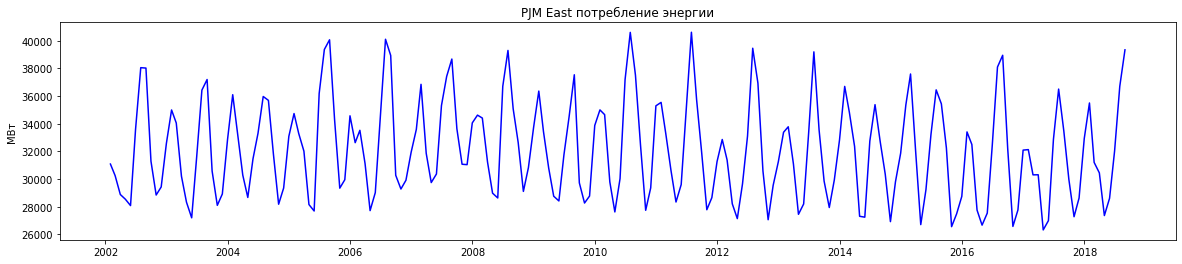

In [15]:
plt.figure(figsize =(20,4))
plt.plot( data_m.index, data_m['PJME_MW'], 'b' )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

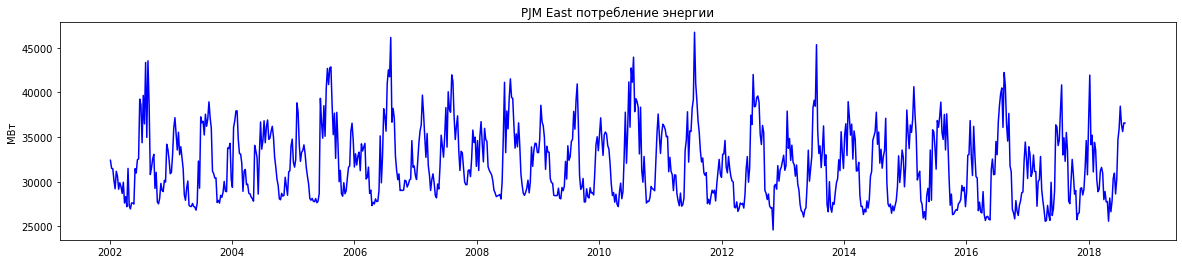

In [193]:
plt.figure(figsize =(20,4))
plt.plot( data_w.index, data_w['PJME_MW'], 'b' )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

#### 2. Подберите параметры модели SARIMAX для этого ряда.


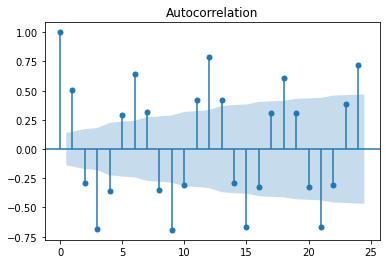

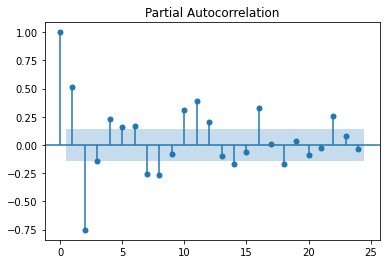

In [16]:

sm.graphics.tsa.plot_acf(data_m['PJME_MW'].values, lags=24)
plt.show()

sm.graphics.tsa.plot_pacf(data_m['PJME_MW'].values, lags=24)
plt.show()

In [248]:
# Определим p, d и q 
q = 2
p = 0
d = 1
pdq = [p, d, q]
# определим комбинации сезонных параметров p, q и q, 
#будем работать с годовыми данными, тогда сезонность это 1 год
qs = 2
ps = 0
ds = 0
seasonal_pdq = [ps, ds, qs , 12] 

In [249]:
print('SARIMAX: p,d,q=',pdq,'   : ps,ds,qs, S=', seasonal_pdq)

SARIMAX: p,d,q= [0, 1, 2]    : ps,ds,qs, S= [0, 0, 2, 12]


In [250]:
#для построения модели используем все данные, кроме 12-х последних месяцев (это будет тестовый набор)
#N1 =1   # берем дданные не от начала - так быстрее работает
N2=12  # число точек для теста
nforecast = N2+12

mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-N2],order=pdq,
                                seasonal_order=seasonal_pdq ,
                                enforce_stationarity= False ,
                                enforce_invertibility=False)
results = mod.fit()
print('SARIMAX{}x{} - AIC:{}'.format(pdq, seasonal_pdq, results.aic))

SARIMAX[0, 1, 2]x[0, 0, 2, 12] - AIC:2909.8914312049837


In [251]:
print(results.summary().tables[0],results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  188
Model:             SARIMAX(0, 1, 2)x(0, 0, 2, 12)   Log Likelihood               -1449.946
Date:                            Wed, 04 Nov 2020   AIC                           2909.891
Time:                                    22:37:24   BIC                           2925.267
Sample:                                         0   HQIC                          2916.135
                                            - 188                                         
Covariance Type:                              opg                                         
========================================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

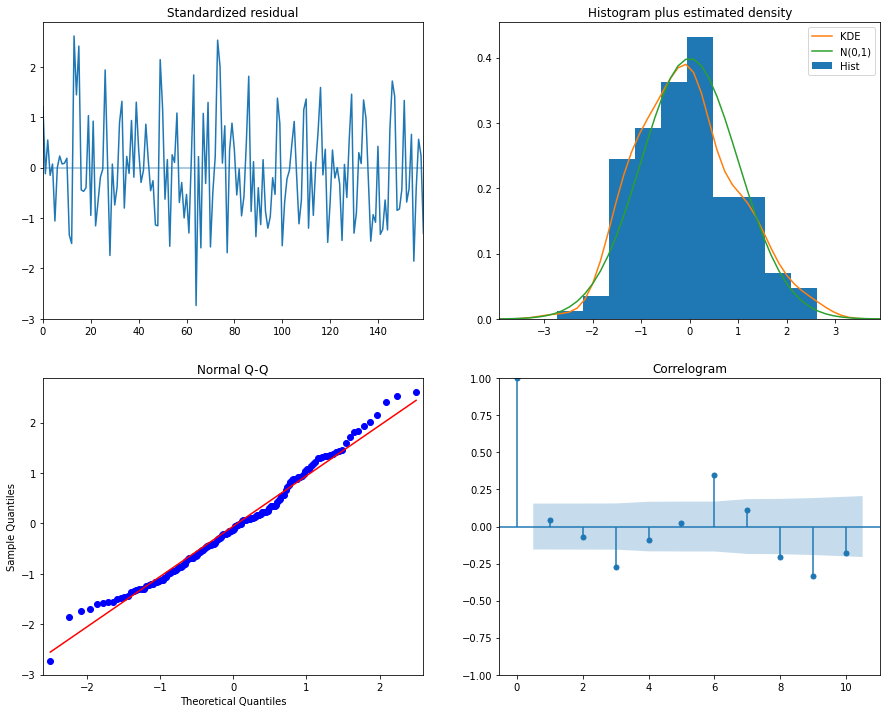

In [252]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

Подобрать параметры модели можно используя сеточный выбор как это сделано для ряда "Потребление энергии" ниже (работает долго!):

- На основании анализа выбираем диапазон изменения параметров сезонности и остатка ряда (для этой модели берем [0,3]).
    
- задаем длину сезона (12 - полный сезон или  6 месяцев - зимой греем, летом кондиционируем и расход энергии примерно одинаковый)
    
- Запускаем генерацию сетки с использованием модуля itertools (itertools.product(p, d, q) - сгенерит декартово множество по p,d,q диапазонам) и задаем полный список вариантов.
    
- Запускаем генерацию SARIMAX - с параметрами и возвращаем AIC.
    
- Лучшее значение параметров (при минимальной оценке AIC) используем для настройки финальной модели.

In [254]:
import itertools

# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q

p = [0] 
d = [0,1]
q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[1]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 0, 12)
SARIMAX: (0, 0, 2) x (0, 0, 0, 12)
SARIMAX: (0, 0, 2) x (0, 0, 1, 12)


In [217]:
warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-12],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)3 - AIC:4416.269672223332
ARIMA(0, 0, 0)x(0, 0, 1, 12)3 - AIC:4015.3605742791565
ARIMA(0, 0, 0)x(0, 0, 2, 12)3 - AIC:3714.4659328110874
ARIMA(0, 0, 0)x(0, 1, 0, 12)3 - AIC:3153.6893700282526
ARIMA(0, 0, 0)x(0, 1, 1, 12)3 - AIC:2927.7162071327216
ARIMA(0, 0, 0)x(0, 1, 2, 12)3 - AIC:2695.3223171841655
ARIMA(0, 0, 1)x(0, 0, 0, 12)3 - AIC:4259.479361221565
ARIMA(0, 0, 1)x(0, 0, 1, 12)3 - AIC:4012.922621937204
ARIMA(0, 0, 1)x(0, 0, 2, 12)3 - AIC:3675.4255013533348
ARIMA(0, 0, 1)x(0, 1, 0, 12)3 - AIC:3114.023015611569
ARIMA(0, 0, 1)x(0, 1, 1, 12)3 - AIC:2890.4757577812434
ARIMA(0, 0, 1)x(0, 1, 2, 12)3 - AIC:2653.750836411007
ARIMA(0, 0, 2)x(0, 0, 0, 12)3 - AIC:4206.520029702571
ARIMA(0, 0, 2)x(0, 0, 1, 12)3 - AIC:3925.530473199796
ARIMA(0, 0, 2)x(0, 0, 2, 12)3 - AIC:3653.270271999603
ARIMA(0, 0, 2)x(0, 1, 0, 12)3 - AIC:3099.1118556134224
ARIMA(0, 0, 2)x(0, 1, 1, 12)3 - AIC:2874.774805687267
ARIMA(0, 0, 2)x(0, 1, 2, 12)3 - AIC:2642.7927718352926
ARIMA(0, 1, 0)x(0, 

ARIMA(2, 1, 2)x(0, 1, 2, 7)3 - AIC:3004.1505605901066
ARIMA(2, 1, 2)x(0, 1, 2, 12)3 - AIC:2630.5999686339474

In [255]:

# ARIMA(2, 1, 2)x(0, 1, 2, 7)3 - AIC:3004.1505605901066
#для построения модели используем все данные, кроме 12-х последних месяцев (это будет тестовый набор)

#N1 =12   # берем дданные не от начала - так быстрее работает
N2=12  # число точек для теста
nforecast = N2+12

mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-N2],order=[2,1,2],
                                seasonal_order=[0,1,2,12] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:{}',results_opt.aic)


AIC:{} 2630.5999686339474


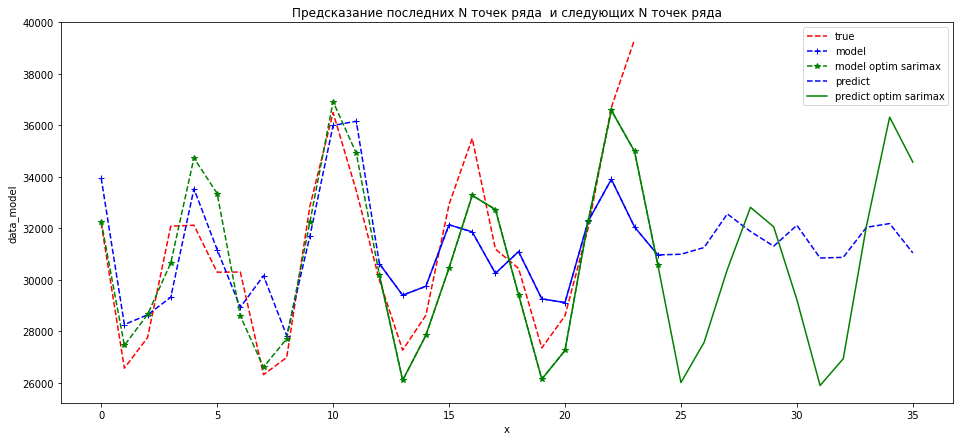

In [256]:
nforecast = N2  # полное число предиктов (тест+ чистый предикт)
N4 = 12
y_p = results.predict(len(data_m['PJME_MW'].values[:-N2])-N4, N4+len(data_m['PJME_MW'].values[:-N2]), typ='levels')
y_ps = results_opt.predict(len(data_m['PJME_MW'].values[:-N2])-N4, N4+len(data_m['PJME_MW'].values[:-N2]), typ='levels')
y_f = results.forecast(2*N2 )
y_fs = results_opt.forecast(2*N2 )

plt.figure(figsize=(16,7))
plt.plot(data_m['PJME_MW'].values[-N2*2:],'--r',label ='true')
plt.plot(range(N2-N4,N2+N4+1),y_p,'+--b',label ='model')
plt.plot(range(N2-N4,N2+N4+1),y_ps,'*--g',label ='model optim sarimax')
plt.plot(np.arange(2*N2)+N2,y_f,'--b',label ='predict')
plt.plot(np.arange(2*N2)+N2,y_fs,'g',label ='predict optim sarimax')

plt.xlabel('x')
plt.ylabel('data_model')
plt.title('Предсказание последних N точек ряда  и следующих N точек ряда')
plt.legend()
plt.show()

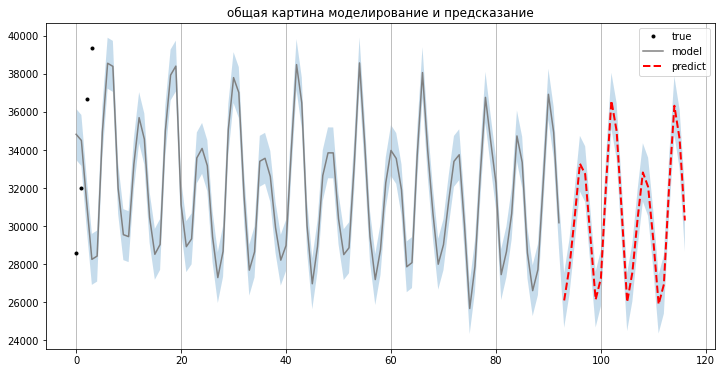

In [257]:
N3=96  # отступ данных для отображения  модели 
nforecast = N2+12  # общее число точек для предсказания (N2 - тестовых точек + точки для чистого предсказания)
predict_ = results_opt.get_prediction(end=results_opt.nobs + nforecast)  # делаем предсказание

# отображаем
idx = np.arange(len(predict_.predicted_mean)-N3)
predict_ci = predict_.conf_int(alpha=0.5)

#
fig, ax = plt.subplots(figsize=(12,6))
ax.xaxis.grid()
ax.plot(data_m['PJME_MW'].values[N3+N1:], 'k.',label='true')

# 
ax.plot(idx[:-nforecast], predict_.predicted_mean[N3:-nforecast], 'gray',label = 'model')
ax.plot(idx[-nforecast:], predict_.predicted_mean[-nforecast:], 'r--', linestyle='--', linewidth=2, label='predict')
ax.fill_between(idx, predict_ci[N3:, 0], predict_ci[N3:, 1], alpha=0.25)
plt.legend()
ax.set(title='общая картина моделирование и предсказание');

#### 3. Сделайте вывод о том, как изменилась модель по сравнению с недельной.



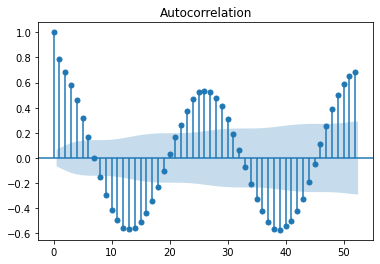

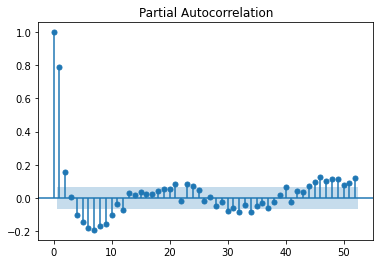

In [194]:

sm.graphics.tsa.plot_acf(data_w['PJME_MW'].values, lags=52)
plt.show()

sm.graphics.tsa.plot_pacf(data_w['PJME_MW'].values, lags=52)
plt.show()

In [321]:
# Определим p, d и q 
q = 2
p = 0
d = 2
pdq = [p, d, q]
# определим комбинации сезонных параметров p, q и q, 
#будем работать с квартальными данными, тогда сезонность это 1 год (или полгода)
qs = 2
ps = 0
ds = 0
seasonal_pdq = [ps, ds, qs , 13] 

In [322]:
print('SARIMAX: p,d,q=',pdq,'   : ps,ds,qs, S=', seasonal_pdq)

SARIMAX: p,d,q= [0, 2, 2]    : ps,ds,qs, S= [0, 0, 2, 13]


In [323]:
#для построения модели используем все данные, кроме 12-х последних месяцев (это будет тестовый набор)
#N1 =1   # берем дданные не от начала - так быстрее работает
N2=52  # число точек для теста
nforecast = N2+52

mod = sm.tsa.statespace.SARIMAX(data_w['PJME_MW'].values[:-N2],order=pdq,
                                seasonal_order=seasonal_pdq ,
                                enforce_stationarity= False ,
                                enforce_invertibility=False)
results = mod.fit()
print('SARIMAX{}x{} - AIC:{}'.format(pdq, seasonal_pdq, results.aic))

SARIMAX[0, 2, 2]x[0, 0, 2, 13] - AIC:14465.984915223013


In [324]:
print(results.summary().tables[0],results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  814
Model:             SARIMAX(0, 2, 2)x(0, 0, 2, 13)   Log Likelihood               -7227.992
Date:                            Wed, 04 Nov 2020   AIC                          14465.985
Time:                                    23:05:48   BIC                          14489.301
Sample:                                         0   HQIC                         14474.951
                                            - 814                                         
Covariance Type:                              opg                                         
========================================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

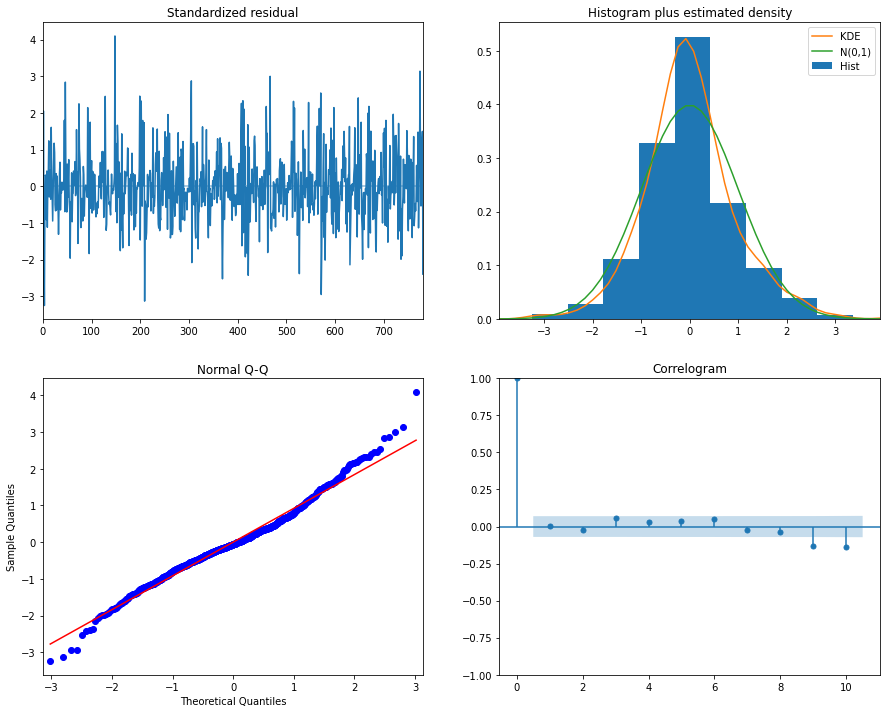

In [325]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

Подобрать параметры модели можно используя сеточный выбор как это сделано для ряда "Потребление энергии" ниже (работает долго!):

- На основании анализа выбираем диапазон изменения параметров сезонности и остатка ряда (для этой модели берем [0,3]).
    
- задаем длину сезона (12 - полный сезон или  6 месяцев - зимой греем, летом кондиционируем и расход энергии примерно одинаковый)
    
- Запускаем генерацию сетки с использованием модуля itertools (itertools.product(p, d, q) - сгенерит декартово множество по p,d,q диапазонам) и задаем полный список вариантов.
    
- Запускаем генерацию SARIMAX - с параметрами и возвращаем AIC.
    
- Лучшее значение параметров (при минимальной оценке AIC) используем для настройки финальной модели.

In [326]:
import itertools

# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q

p = [0] 
d = [0,1]
q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 13) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[1]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 13)
SARIMAX: (0, 0, 1) x (0, 0, 0, 13)
SARIMAX: (0, 0, 2) x (0, 0, 0, 13)
SARIMAX: (0, 0, 2) x (0, 0, 1, 13)


In [327]:
warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-52],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 13)3 - AIC:3474.0300583909584
ARIMA(0, 0, 0)x(0, 0, 1, 13)3 - AIC:3079.5943751342475
ARIMA(0, 0, 0)x(0, 0, 2, 13)3 - AIC:2729.6783323079935
ARIMA(0, 0, 0)x(0, 1, 0, 13)3 - AIC:2581.7519611291314
ARIMA(0, 0, 0)x(0, 1, 1, 13)3 - AIC:2330.44752075725
ARIMA(0, 0, 0)x(0, 1, 2, 13)3 - AIC:2078.2412653197985
ARIMA(0, 0, 1)x(0, 0, 0, 13)3 - AIC:3346.6881539344736
ARIMA(0, 0, 1)x(0, 0, 1, 13)3 - AIC:3028.4469468325456
ARIMA(0, 0, 1)x(0, 0, 2, 13)3 - AIC:3949.6720707135873
ARIMA(0, 0, 1)x(0, 1, 0, 13)3 - AIC:2521.50214792546
ARIMA(0, 0, 1)x(0, 1, 1, 13)3 - AIC:2279.6508120585568
ARIMA(0, 0, 1)x(0, 1, 2, 13)3 - AIC:2032.0600169147233
ARIMA(0, 0, 2)x(0, 0, 0, 13)3 - AIC:3300.7129238388643
ARIMA(0, 0, 2)x(0, 0, 1, 13)3 - AIC:2999.141510905114
ARIMA(0, 0, 2)x(0, 0, 2, 13)3 - AIC:5855.572481513544
ARIMA(0, 0, 2)x(0, 1, 0, 13)3 - AIC:2486.755894021792
ARIMA(0, 0, 2)x(0, 1, 1, 13)3 - AIC:2246.7138718544697
ARIMA(0, 0, 2)x(0, 1, 2, 13)3 - AIC:1999.2212767411581
ARIMA(0, 1, 0)x(0

ARIMA(2, 0, 2)x(0, 1, 2, 13)3 - AIC:1931.593933199859

ARIMA(2, 1, 2)x(0, 1, 1, 26)3 - AIC:1713.4221394351607

In [328]:

# ARIMA(2, 0, 2)x(0, 1, 2, 13)3 - AIC:1931.593933199859
#для построения модели используем все данные, кроме 12-х последних месяцев (это будет тестовый набор)

#N1 =12   # берем дданные не от начала - так быстрее работает
N2=52  # число точек для теста
nforecast = N2+52

mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-N2],order=[2,0,2],
                                seasonal_order=[0,1,2,13] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:', results_opt.aic)


AIC: 1931.593933199859


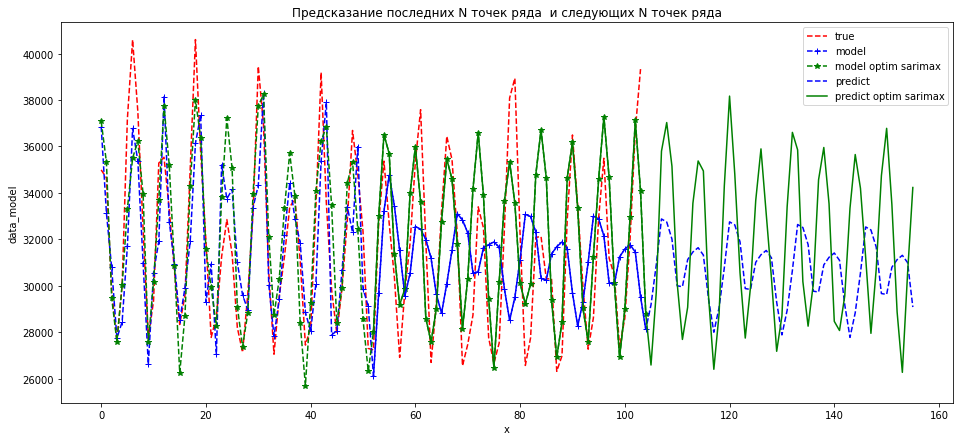

In [329]:
nforecast = N2  # полное число предиктов (тест+ чистый предикт)
N4 = 52
y_p = results.predict(len(data_m['PJME_MW'].values[:-N2])-N4, N4+len(data_m['PJME_MW'].values[:-N2]), typ='levels')
y_ps = results_opt.predict(len(data_m['PJME_MW'].values[:-N2])-N4, N4+len(data_m['PJME_MW'].values[:-N2]), typ='levels')
y_f = results.forecast(2*N2 )
y_fs = results_opt.forecast(2*N2 )

plt.figure(figsize=(16,7))
plt.plot(data_m['PJME_MW'].values[-N2*2:],'--r',label ='true')
plt.plot(range(N2-N4,N2+N4+1),y_p,'+--b',label ='model')
plt.plot(range(N2-N4,N2+N4+1),y_ps,'*--g',label ='model optim sarimax')
plt.plot(np.arange(2*N2)+N2,y_f,'--b',label ='predict')
plt.plot(np.arange(2*N2)+N2,y_fs,'g',label ='predict optim sarimax')

plt.xlabel('x')
plt.ylabel('data_model')
plt.title('Предсказание последних N точек ряда  и следующих N точек ряда')
plt.legend()
plt.show()

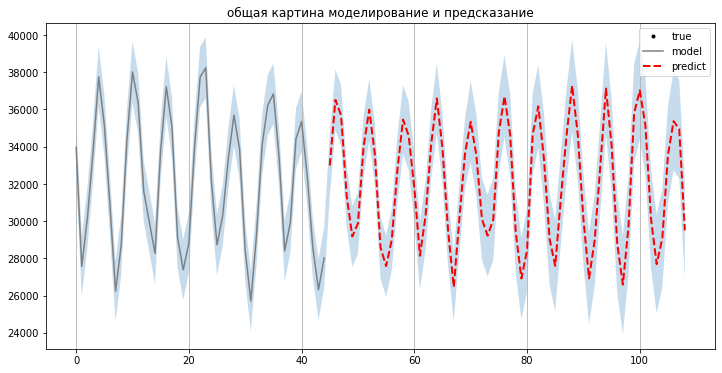

In [330]:
N3=104 # отступ данных для отображения  модели 
nforecast = N2+12  # общее число точек для предсказания (N2 - тестовых точек + точки для чистого предсказания)
predict_ = results_opt.get_prediction(end=results_opt.nobs + nforecast)  # делаем предсказание

# отображаем
idx = np.arange(len(predict_.predicted_mean)-N3)
predict_ci = predict_.conf_int(alpha=0.5)

#
fig, ax = plt.subplots(figsize=(12,6))
ax.xaxis.grid()
ax.plot(data_m['PJME_MW'].values[N3+N1:], 'k.',label='true')

# 
ax.plot(idx[:-nforecast], predict_.predicted_mean[N3:-nforecast], 'gray',label = 'model')
ax.plot(idx[-nforecast:], predict_.predicted_mean[-nforecast:], 'r--', linestyle='--', linewidth=2, label='predict')
ax.fill_between(idx, predict_ci[N3:, 0], predict_ci[N3:, 1], alpha=0.25)
plt.legend()
ax.set(title='общая картина моделирование и предсказание');

__Вывод:__

В целом на месячных данных предсказание хуже, чем на недельных. Это можно объяснить тем что существуют недельные циклы в исходных данных, а в месяцах количество недель разное в разных месяцах, кроме того количество рабочих дней и количество выходных дней по разному распределяются в разных месяцах.

Поэтому resamle делать крупнее чем на неделю не стоит

-----

#### 4. Постройте ACF, PACF и модель ARIMA для BRENT (lнедельный )



In [332]:
path_brent = 'my_BRENT2019.csv'
brent_data = pd.read_csv(path_brent,sep = ',', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


In [333]:
brent_data.describe()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
count,2667.000000,2667.000000,2667.00000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000
mean,81.533547,2014.661042,6.51706,15.715786,2.505062,182.901762,26.486689,2.537308,0.027747,0.026997,0.029621
std,26.349469,2.663525,3.43026,8.780275,1.112684,104.741067,14.935147,1.894937,0.164277,0.162104,0.169572
min,27.850000,2010.000000,1.00000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,56.840000,2012.000000,4.00000,8.000000,2.000000,92.000000,14.000000,1.000000,0.000000,0.000000,0.000000
50%,77.710000,2015.000000,7.00000,16.000000,3.000000,183.000000,27.000000,2.000000,0.000000,0.000000,0.000000
75%,108.190000,2017.000000,9.00000,23.000000,3.000000,273.000000,39.000000,4.000000,0.000000,0.000000,0.000000
max,126.900000,2019.000000,12.00000,31.000000,4.000000,366.000000,53.000000,6.000000,1.000000,1.000000,1.000000


In [359]:
brent_w = brent_data.copy().resample('W').mean()
brent_w.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.2,0.000000
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.0,0.166667
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.0,0.000000
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.0,0.000000
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.0,0.000000


In [360]:
brent_w.columns

Index(['Значение', 'year', 'month', 'dayofmonth', 'quarter', 'dayofyear',
       'weekofyear', 'dayofweek', 'is_holiday', 'is_prev_holiday',
       'is_next_holiday'],
      dtype='object')

In [361]:
# Уберем колонки которые при данном ресемпле теряют смысл
brent_w = brent_w.drop(['month', 'dayofmonth', 'quarter', 'dayofyear',
       'dayofweek', 'is_holiday', 'is_prev_holiday',
       'is_next_holiday'], axis = 1)
brent_w.head()

,Значение,year,weekofyear
Дата,,,
2010-09-05,76.616000,2010.0,35.0
2010-09-12,77.673333,2010.0,36.0
2010-09-19,78.693333,2010.0,37.0
2010-09-26,78.518333,2010.0,38.0
2010-10-03,81.211667,2010.0,39.0


In [400]:
brent_m = brent_data.copy().resample('M').mean()
brent_m.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-30,78.228148,2010.0,9.0,15.185185,3.0,258.185185,36.925926,2.703704,0.037037,0.037037,0.037037
2010-10-31,83.473462,2010.0,10.0,16.000000,4.0,289.000000,41.307692,2.846154,0.038462,0.038462,0.038462
2010-11-30,86.178077,2010.0,11.0,15.346154,4.0,319.346154,45.692308,2.500000,0.076923,0.076923,0.076923
2010-12-31,92.232308,2010.0,12.0,16.384615,4.0,350.384615,50.115385,2.576923,0.076923,0.076923,0.000000
2011-01-31,97.033200,2011.0,1.0,16.680000,1.0,16.680000,4.640000,2.760000,0.040000,0.040000,0.040000


Text(0.5, 0, 't')

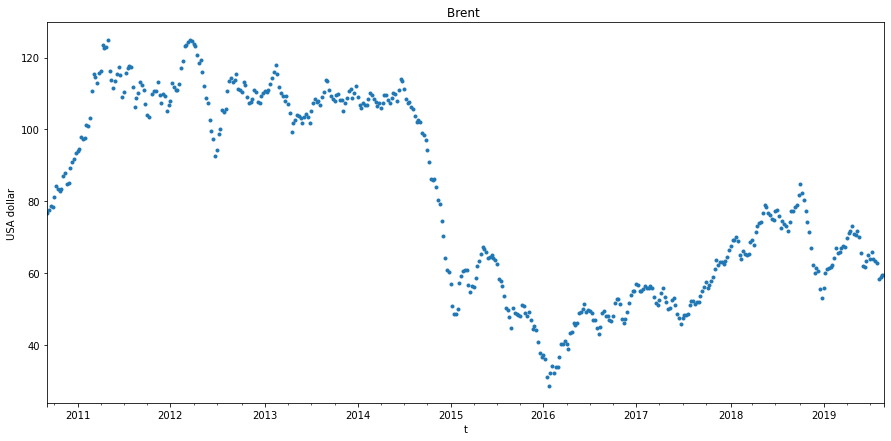

In [362]:
_ = brent_w['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [363]:
brent_w.head()

,Значение,year,weekofyear
Дата,,,
2010-09-05,76.616000,2010.0,35.0
2010-09-12,77.673333,2010.0,36.0
2010-09-19,78.693333,2010.0,37.0
2010-09-26,78.518333,2010.0,38.0
2010-10-03,81.211667,2010.0,39.0


In [371]:
brent_w.shape

(470, 3)

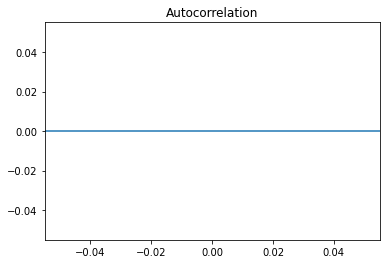

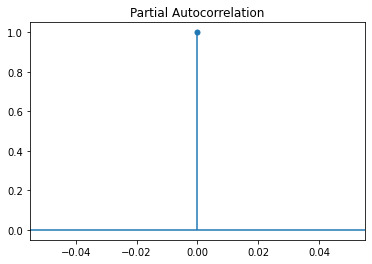

In [412]:
sm.graphics.tsa.plot_acf(brent_w['Значение'].values, lags=12)
plt.show()
#plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(brent_w['Значение'].values, lags=12)
plt.show()

#### ?????? Почему то на недельных данных не хочет строить acf и pacf ????????

#### На месячных строится:

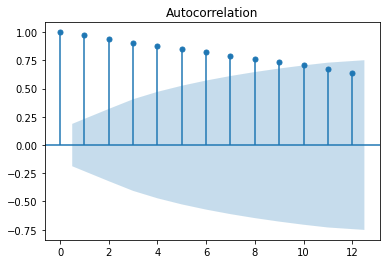

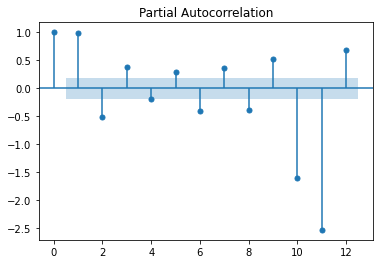

In [401]:
sm.graphics.tsa.plot_acf(brent_m['Значение'].values, lags=12)
plt.show()
#plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(brent_m['Значение'].values, lags=12)
plt.show()

In [402]:
brent_m['Значение'].values

array([ 78.22814815,  83.47346154,  86.17807692,  92.23230769,
        97.0332    , 104.45125   , 114.81153846, 123.19782609,
       114.34538462, 113.53038462, 116.51269231, 109.72037037,
       109.35923077, 107.34117647, 110.23115385, 107.47043478,
       111.522     , 119.1012    , 124.50230769, 120.3776    ,
       109.81518519,  96.0188    , 102.33703704, 111.77111111,
       112.9208    , 110.96037037, 108.91384615, 108.7132    ,
       111.53708333, 115.48842105, 109.12826087, 103.16307692,
       103.16518519, 103.1084    , 107.2       , 109.7104    ,
       110.48307692, 108.92259259, 107.7692    , 110.4268    ,
       106.7864    , 108.55916667, 107.64692308, 108.1228    ,
       108.92521739, 111.58076923, 108.22444444, 103.68692308,
        98.83846154,  88.40576923,  79.71625   ,  63.29153846,
        49.9136    ,  59.08291667,  57.26407407,  61.14391304,
        66.0145    ,  64.09909091,  57.30043478,  48.15142857,
        48.79090909,  49.53      ,  46.39142857,  39.30

Text(0.5, 0, 't')

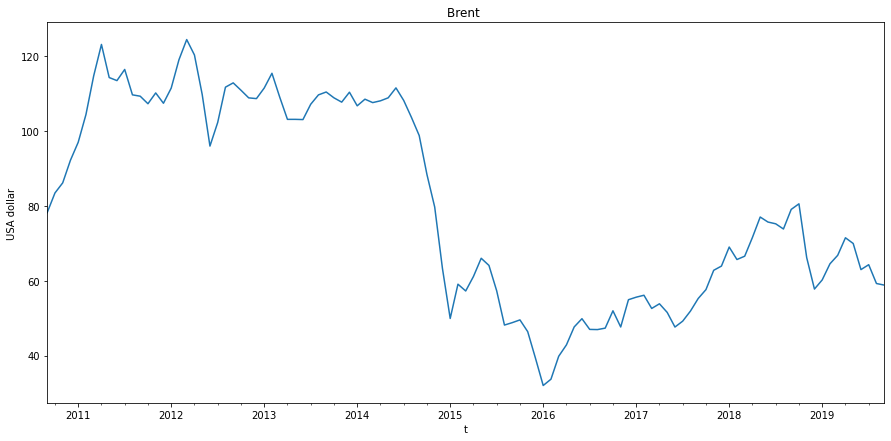

In [406]:
_ = brent_m['Значение'].plot(figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

Построим ACF и PACF для первых разностей

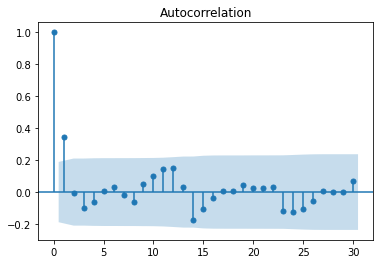

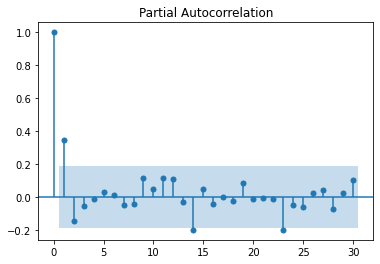

In [410]:
#plt.figure(figsize=(20,8))
#plt.subplot(2,1,1)
brent_dif = brent_m['Значение'].diff(1)

sm.graphics.tsa.plot_acf(brent_dif[1:], lags=30)
plt.show()
#plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(brent_dif[1:], lags=30)
plt.show()

--------

##### Построим модель ARIMA для brent_w:

--------


In [521]:
# Определим p, d и q 

p = 1
d = 0
q = 2

pdq = [p, d, q]

N2=13
warnings.filterwarnings("ignore") # отключает предупреждения

modb = sm.tsa.statespace.SARIMAX(brent_w['Значение'].values[:-N2],
                               order=pdq,seasonal_order=[0,0,0,0], trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb = modb.fit()
print('ARIMA{} - AIC:{}'.format(pdq, resultsb.aic))

print(resultsb.summary().tables[0],resultsb.summary().tables[1])

ARIMA[1, 0, 2] - AIC:1971.7949357212888
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  457
Model:               SARIMAX(1, 0, 2)   Log Likelihood                -979.897
Date:                Thu, 05 Nov 2020   AIC                           1971.795
Time:                        00:45:37   BIC                           1996.504
Sample:                             0   HQIC                          1981.530
                                - 457                                         
Covariance Type:                  opg                                         
============================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   

Коэффициент модели  ar.L2 имеет малое абсолютное значение, что свидетельствует о том, что он не играет роли при определении ответа модели. посмотрим на визуализацию результатов работы модели, где видно, что остатки ряда распределены не одинаково на краях модели и в ее основной части, что не позволит принимать правильное решение (рис.Normal Q-Q, Standardized rezidual)

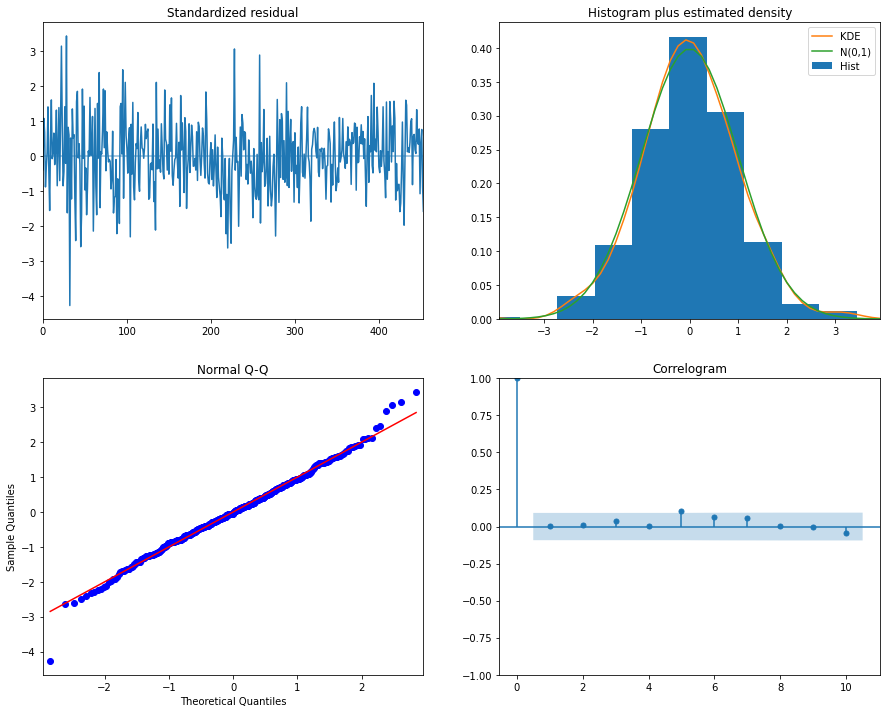

In [522]:
resultsb.plot_diagnostics(figsize=(15, 12))
plt.show()

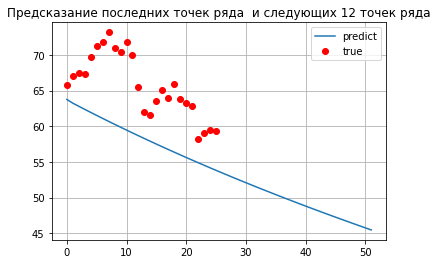

In [524]:
pred_dynamic = resultsb.forecast(52)    

plt.plot(pred_dynamic, label='predict' )
#Отобразим истинный значения 
plt.plot(brent_w['Значение'].values[-26:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 12 точек ряда')
plt.legend()
plt.grid()
plt.plot()
plt.show()

Для подбора оптимальных значений параметров модели временного ряда ARIMA (p, d, q), используем сеточный поиск

In [443]:
import itertools
# Определим p, d и q в диапазоне 0-3
d = [0,1]
p = [0,1] 
q = range(0, 7)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [0,0,0,0] # нет сезона

warnings.filterwarnings("ignore") # отключает предупреждения

for param in pdq:
    param_seasonal = seasonal_pdq
    try:
        mod_b = sm.tsa.statespace.SARIMAX(np.log(brent_w['Значение'].values[:-26]),
                                          order=param,seasonal_order=[0,0,0,0],trend='ct',
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)

        results_ = mod_b.fit()
        print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_.aic))
    except:
        continue

ARIMA(0, 0, 0)x[0, 0, 0, 0] - AIC:70.14611004705509
ARIMA(0, 0, 1)x[0, 0, 0, 0] - AIC:-488.5809752234776
ARIMA(0, 0, 2)x[0, 0, 0, 0] - AIC:-893.371721680526
ARIMA(0, 0, 3)x[0, 0, 0, 0] - AIC:-722.9159113988842
ARIMA(0, 0, 4)x[0, 0, 0, 0] - AIC:-860.7983498316554
ARIMA(0, 0, 5)x[0, 0, 0, 0] - AIC:-1173.2681960429577
ARIMA(0, 0, 6)x[0, 0, 0, 0] - AIC:-1318.6121451906135
ARIMA(0, 1, 0)x[0, 0, 0, 0] - AIC:-1758.5084251780445
ARIMA(0, 1, 1)x[0, 0, 0, 0] - AIC:-1809.0684117598905
ARIMA(0, 1, 2)x[0, 0, 0, 0] - AIC:-1802.2092350479056
ARIMA(0, 1, 3)x[0, 0, 0, 0] - AIC:-1797.1002439041154
ARIMA(0, 1, 4)x[0, 0, 0, 0] - AIC:-1790.132167232207
ARIMA(0, 1, 5)x[0, 0, 0, 0] - AIC:-1785.3304610642372
ARIMA(0, 1, 6)x[0, 0, 0, 0] - AIC:-1782.683032823889
ARIMA(1, 0, 0)x[0, 0, 0, 0] - AIC:-1764.0587115307494
ARIMA(1, 0, 1)x[0, 0, 0, 0] - AIC:-1815.2046908744871
ARIMA(1, 0, 2)x[0, 0, 0, 0] - AIC:-1808.4595335438435
ARIMA(1, 0, 3)x[0, 0, 0, 0] - AIC:-1802.433282486566
ARIMA(1, 0, 4)x[0, 0, 0, 0] - AIC:-179

ARIMA(1, 0, 1)x[0, 0, 0, 0] - AIC:-1815.2046908744871

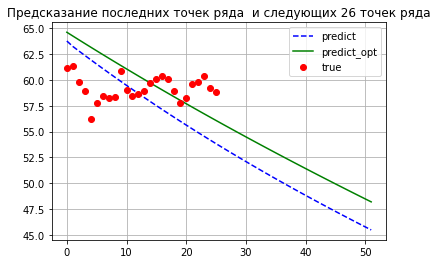

In [525]:

N2=26
nforecast = N2+26

modb_opt = sm.tsa.statespace.SARIMAX(brent_w['Значение'].values[:-N2],
                               order=[1,0,1],seasonal_order=[0,0,0,0],trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb_opt = modb_opt.fit()
pred_dynamic = resultsb.forecast(nforecast)    #делаем предсказание c 27 точки от текущего конца ряда
pred_dynamic_opt = resultsb_opt.forecast(52) 

plt.plot(pred_dynamic,'--b', label='predict' )
plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(brent_data['Значение'].values[-N2:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 26 точек ряда')
plt.legend()
plt.grid()
plt.show()

Улучшеная модель ближе к первым по времени точкам выборки на отрезке предсказания. 

Проверим остатки модели.

In [526]:
resultsb_opt.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
intercept,1.4727,0.945,1.559,0.119,-0.379,3.325
drift,-0.0024,0.002,-1.418,0.156,-0.006,0.001
ar.L1,0.9879,0.008,126.555,0.000,0.973,1.003
ma.L1,0.3669,0.044,8.250,0.000,0.280,0.454
sigma2,4.4557,0.254,17.536,0.000,3.958,4.954


Посмотрим на модель на этапе предсказания и этапе описания данных

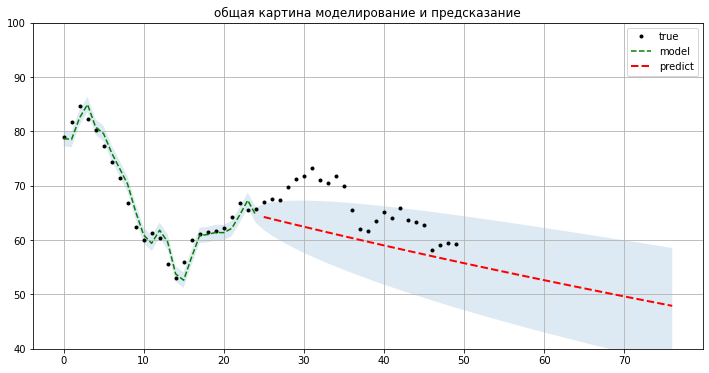

In [527]:
N2=26 # число точек для теста
nforecast = N2+26  # общее число точек для предсказания (тест+ чистое предсказание)
N3=420 # отступ от начала известной информации для визуализации
predict_ = resultsb_opt.get_prediction(end=resultsb_opt.nobs + nforecast)   
# получаем результаты работы модели по всей выборке

# отображаем результаты
idx = np.arange(len(predict_.predicted_mean)-N3)
predict_ci = predict_.conf_int(alpha=0.5)

#
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(brent_w['Значение'].values[N3:], 'k.',label='true')
plt.ylim([40,100])
plt.grid()
ax.plot(idx[:-nforecast], predict_.predicted_mean[N3:-nforecast], '--g',label='model')
ax.plot(idx[-nforecast:], predict_.predicted_mean[-nforecast:], 'r--', linestyle='--', linewidth=2,label = 'predict')
ax.fill_between(idx, predict_ci[N3:, 0], predict_ci[N3:, 1], alpha=0.15)
plt.legend()

ax.set(title='общая картина моделирование и предсказание');

In [530]:
import itertools
# Определим p, d и q в диапазоне 0-3
d = [0,1]
p = [0,1,2] 
q = range(0, 7)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [0,0,0,0] # нет сезона

warnings.filterwarnings("ignore") # отключает предупреждения

for param in pdq:
    param_seasonal = seasonal_pdq
    try:
        mod_b = sm.tsa.statespace.SARIMAX(np.log(brent_w['Значение'].values[:-13]),
                                          order=param,seasonal_order=[0,0,0,0],trend='ct',
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)

        results_ = mod_b.fit()
        print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_.aic))
    except:
        continue

ARIMA(0, 0, 0)x[0, 0, 0, 0] - AIC:80.06853501731837
ARIMA(0, 0, 1)x[0, 0, 0, 0] - AIC:-495.991828772694
ARIMA(0, 0, 2)x[0, 0, 0, 0] - AIC:-628.3807153936041
ARIMA(0, 0, 3)x[0, 0, 0, 0] - AIC:-1165.538312947966
ARIMA(0, 0, 4)x[0, 0, 0, 0] - AIC:-903.2081192616197
ARIMA(0, 0, 5)x[0, 0, 0, 0] - AIC:-1378.5665309534293
ARIMA(0, 0, 6)x[0, 0, 0, 0] - AIC:-1297.2712283113256
ARIMA(0, 1, 0)x[0, 0, 0, 0] - AIC:-1815.2759188537898
ARIMA(0, 1, 1)x[0, 0, 0, 0] - AIC:-1867.6490404267108
ARIMA(0, 1, 2)x[0, 0, 0, 0] - AIC:-1860.8847073900506
ARIMA(0, 1, 3)x[0, 0, 0, 0] - AIC:-1855.8893097104292
ARIMA(0, 1, 4)x[0, 0, 0, 0] - AIC:-1848.9040925803506
ARIMA(0, 1, 5)x[0, 0, 0, 0] - AIC:-1843.8456739634485
ARIMA(0, 1, 6)x[0, 0, 0, 0] - AIC:-1841.3060987068366
ARIMA(1, 0, 0)x[0, 0, 0, 0] - AIC:-1820.7415896395464
ARIMA(1, 0, 1)x[0, 0, 0, 0] - AIC:-1873.7082207072476
ARIMA(1, 0, 2)x[0, 0, 0, 0] - AIC:-1867.0877883624266
ARIMA(1, 0, 3)x[0, 0, 0, 0] - AIC:-1861.175799184342
ARIMA(1, 0, 4)x[0, 0, 0, 0] - AIC:-1

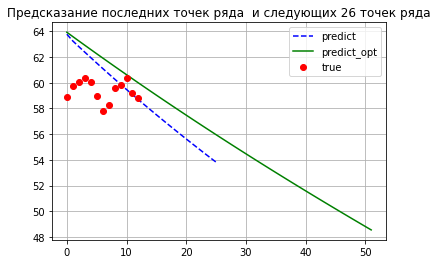

In [534]:
# ARIMA(1, 0, 1)x[0, 0, 0, 0] - AIC:-1873.7082207072476
N2=13
nforecast = N2+13

modb_opt = sm.tsa.statespace.SARIMAX(brent_w['Значение'].values[:-N2],
                               order=[1,0,1],seasonal_order=[0,0,0,0],trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb_opt = modb_opt.fit()
pred_dynamic = resultsb.forecast(nforecast)    #делаем предсказание c 27 точки от текущего конца ряда
pred_dynamic_opt = resultsb_opt.forecast(52) 

plt.plot(pred_dynamic,'--b', label='predict' )
plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(brent_data['Значение'].values[-N2:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 26 точек ряда')
plt.legend()
plt.grid()
plt.show()

In [536]:
resultsb_opt.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
intercept,1.3950,0.912,1.530,0.126,-0.393,3.183
drift,-0.0022,0.002,-1.378,0.168,-0.005,0.001
ar.L1,0.9884,0.008,130.310,0.000,0.974,1.003
ma.L1,0.3698,0.044,8.476,0.000,0.284,0.455
sigma2,4.4100,0.248,17.764,0.000,3.923,4.897


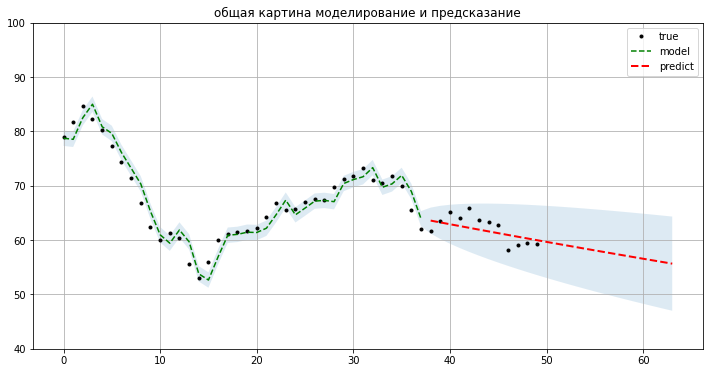

In [535]:
N2=13 # число точек для теста
nforecast = N2+13  # общее число точек для предсказания (тест+ чистое предсказание)
N3=420 # отступ от начала известной информации для визуализации
predict_ = resultsb_opt.get_prediction(end=resultsb_opt.nobs + nforecast)   
# получаем результаты работы модели по всей выборке

# отображаем результаты
idx = np.arange(len(predict_.predicted_mean)-N3)
predict_ci = predict_.conf_int(alpha=0.5)

#
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(brent_w['Значение'].values[N3:], 'k.',label='true')
plt.ylim([40,100])
plt.grid()
ax.plot(idx[:-nforecast], predict_.predicted_mean[N3:-nforecast], '--g',label='model')
ax.plot(idx[-nforecast:], predict_.predicted_mean[-nforecast:], 'r--', linestyle='--', linewidth=2,label = 'predict')
ax.fill_between(idx, predict_ci[N3:, 0], predict_ci[N3:, 1], alpha=0.15)
plt.legend()

ax.set(title='общая картина моделирование и предсказание');

#### 5. Оцените результат моделирования

При условии когда я брал для предсказания не 13 точек а 26, улучшенная модель показывает лучшее расположение относительно точек предсказания, но на 13 точках относительно простой моели показывает хуже расположение.
Но в целом если смотреть на график моделирования и предсказания, то на 13 точках показывает точнее, так как при 26 точках - первые несколько точек выходят за рамки предсказываемого коридора.

In [507]:
arr = resultsb_opt.resid

In [508]:
res = [x for x in resultsb_opt.resid if ~np.isnan(x)]

In [509]:

adf_test = sm.tsa.stattools.adfuller(res)
print(adf_test)


(-41.63899610785058, 0.0, 0, 455, {'1%': -3.4448040131772584, '5%': -2.8679131843980197, '10%': -2.5701646673107112}, 1904.3632668775379)


-------

ADF тест (adf_test[1] = 0) показывает, что остатки являются вроде как являются стационарным рядом, что дает возможность говорить о том что данная модель позволяет прогнозировать с некоторой степенью точнностью (коридор расходящийся но тем неменее)

-------

#### 6. Сделайте предположение о моделях, которые лучше работают с техниками регрессии на основе AR I MA.

С техниками регрессии можно работать как с константой, как с соскользящей средней, как с экспоненциальным сглаживанием

Если горизонт планирования небольшой то думаю что лучше будет работать экспоненциальное сглаживание или взвешенное скользящее среднее, а вот на большом горизонте - лучше константа, так как экспоненциальное сглаживание может расходиться гораздо больше чем константа.